1. Загрузите данные из файла churn-bigml-80.csv
Проведите базовый осмотр данных.
сколько строк, сколько столбцов, есть ли пустые значения?

определите общее количество абонентов отказавшихся от обслуживания (переменная Churn)

Исследуйте зависимость целевой переменной Churn 
от переменных 
Voice mail plan
International plan
Customer service calls



Сформулируйте гипотезы о зависимости.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns # биб-ка seaborn основана на matplotlib, для визуализации данных
import numpy as np

In [4]:
df = pd.read_csv('churn-bigml-80.csv')

In [5]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


Первичный осмотр

In [6]:
df.shape

(2666, 20)

In [8]:
df.info() # пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [12]:
df['Churn'].value_counts() # кол-во отказавшихся от обслуживания - 388

False    2278
True      388
Name: Churn, dtype: int64

Поля International plan и Voice mail plan категориальные, закодируем их, чтобы дальше работать с ними

In [19]:
df['Voice mail plan'] # это поле категориальное, т.к. два значения всего можно закодировать их 0 и 1

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
2661     No
2662    Yes
2663     No
2664     No
2665    Yes
Name: Voice mail plan, Length: 2666, dtype: object

In [20]:
dic = {
    'No':0, 
    'Yes':1
} # создаем словарь

In [21]:
df['Voice mail plan'] = df['Voice mail plan'].map(dic) # с помощью ф-ции map меняем значения столбца Voice mail plan

In [22]:
df['Voice mail plan'] # в результате получили бинарный признак, избавились от слов

0       1
1       1
2       0
3       0
4       0
       ..
2661    0
2662    1
2663    0
2664    0
2665    1
Name: Voice mail plan, Length: 2666, dtype: int64

In [ ]:
# аналогично поступаем с полем International plan

In [23]:
df['International plan']

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
2661     No
2662     No
2663     No
2664     No
2665     No
Name: International plan, Length: 2666, dtype: object

In [24]:
df['International plan'] = df['International plan'].map(dic)

In [25]:
df['International plan']

0       0
1       0
2       0
3       1
4       1
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: International plan, Length: 2666, dtype: int64

In [27]:
factors = ['Voice mail plan','International plan','Customer service calls', 'Churn'] # выбираем признаки из датасета

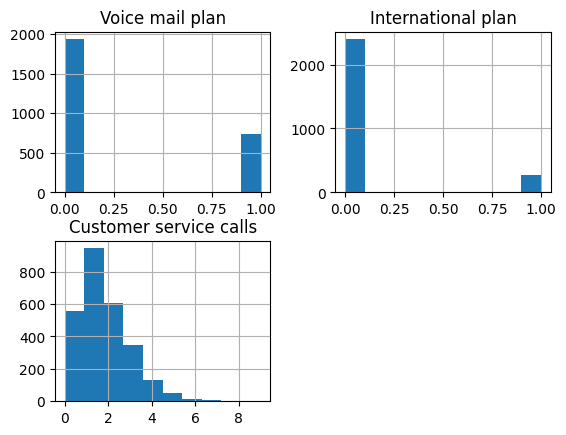

In [28]:
df[factors].hist(); # строим гистограммы